In [1]:
import numpy as np
%matplotlib inline

{TRACE_SEQUENCE_LINE: 0, TRACE_SEQUENCE_FILE: 0, FieldRecord: 0, TraceNumber: 0, EnergySourcePoint: 0, CDP: 804, CDP_TRACE: 804, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 0, offset: 0, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: 1, SourceGroupScalar: 1, SourceX: 625, SourceY: 0, GroupX: 0, GroupY: 0, CoordinateUnits: 0, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 1801, TRACE_SAMPLE_INTERVAL: 6250, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLengthStart: 0, SweepTraceTaperLen

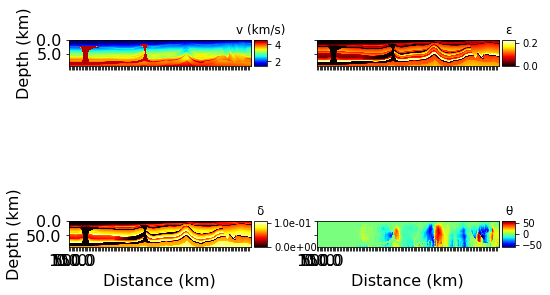

In [2]:
import segyio
from examples.seismic import Model,plot_velocity
from plot_parameters import plot

par_dir_files='/home/oscar/Downloads/ModelParams/'
shot_dir_files='/home/oscar/Downloads/ModelShots/'
par_files=['Delta_Model.sgy','Epsilon_Model.sgy','Theta_Model.sgy','Vp_Model.sgy']
shot_files=['Anisotropic_FD_Model_Shots_part1.sgy', 'Anisotropic_FD_Model_Shots_part2.sgy', 
            'Anisotropic_FD_Model_Shots_part3.sgy','Anisotropic_FD_Model_Shots_part4.sgy']
par_files = [par_dir_files + sub for sub in par_files] 
shot_files = [shot_dir_files + sub for sub in shot_files]

# Read velocity model
f = segyio.open(par_files[-1], iline=segyio.tracefield.TraceField.FieldRecord, 
                xline=segyio.tracefield.TraceField.CDP)
xl, il, t = f.xlines, f.ilines, f.samples
dz = t[1] - t[0]
dx=f.header[1][segyio.TraceField.SourceX]-f.header[0][segyio.TraceField.SourceX]
print(f.header[1])
print(dx,dz)

if len(il) != 1: 
  dims=(len(xl), len(il), len(f.samples)) 
else:
  dims=(len(xl), len(f.samples)) 

vp=f.trace.raw[:].reshape(dims)
vp*=1./1000
epsilon = np.empty(dims)
delta = np.empty(dims)
theta = np.empty(dims)
params=[delta, epsilon, theta]

# Read Thomsem parameters
for segyfile, par in zip(par_files, params):
    f = segyio.open(segyfile, iline=segyio.tracefield.TraceField.FieldRecord, 
                xline=segyio.tracefield.TraceField.CDP)
    par[:]=f.trace.raw[:].reshape(dims)
 
print("Original model dims: {0}".format(dims))
plot(vp,epsilon,delta,theta)

In [3]:
import time
import math
# Read shots
start = time.time()
f = segyio.open(shot_files[0], ignore_geometry=True)
num_samples = len(f.samples) # number of samples
print(num_samples)
samp_int = f.bin[segyio.BinField.Interval]/1000 # samples interval
print(samp_int)
records=f.group(segyio.TraceField.FieldRecord) # groups with the same FieldRecord

if int(f.header[0][segyio.TraceField.ElevationScalar]) != 1: 
  scalel=abs(1./f.header[0][segyio.TraceField.ElevationScalar])
else:
  scalel=abs(f.header[0][segyio.TraceField.ElevationScalar])
#
if int(f.header[0][segyio.TraceField.SourceGroupScalar]) != 1: 
  scalco=abs(1./f.header[0][segyio.TraceField.SourceGroupScalar])
else:
  scalco=abs(f.header[0][segyio.TraceField.SourceGroupScalar])


shots=[] # empty list
src_coordinates = np.empty((len(records), 2)) # numpy array for source coordinates
num_traces= np.empty(len(records), dtype = np.int32) # numpy array of of 'int32' type
rec_coordinates = [] # empty list

for (index, value) in enumerate(records.values()):
  #print(value.key) # print shot id
  num_traces[index]=0
  rec_coordinates.append([])
  for header in value.header:
    rec_coordinates[index].append((header[segyio.TraceField.GroupX]*scalco,header[segyio.TraceField.GroupY]*scalel)) # list w receivers coordinates
    num_traces[index]+=1
  src_coordinates[index,:] = [header[segyio.TraceField.SourceX]*scalco,header[segyio.TraceField.SourceY]*scalel] # set src coordinates 
  rec_coordinates[index]=np.array(rec_coordinates[index]) #convert list to numpy array
  from_group = np.stack(records[value.key].trace) #numpy array with traces of the same record
  shots.append(from_group) # append shot to list
#shots = np.asarray(shots)# array of arrays
print(f'Shot loaded in {time.time()-start} seconds')

1151
8.0


/home/oscar/anaconda2/envs/devito_newest/lib/python3.7/site-packages/segyio/segy.py:995: FutureWarning: group is experimental and may change in the future
  warnings.warn(msg, FutureWarning)
/home/oscar/anaconda2/envs/devito_newest/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Shot loaded in 21.176401615142822 seconds


[1.005e+04 1.700e-03] [1.01e+04 1.70e-03]
1336
6.25
(1337, 900)
10050.0 10012.5
(536, 900)
(18.75, 12.5)
(18.75, 0.0)
1
536


Operator `initdamp` run in 0.01 s
Operator `padfunc` run in 0.01 s
Operator `padfunc` run in 0.01 s
Operator `padfunc` run in 0.01 s
Operator `padfunc` run in 0.01 s


(696, 1060)


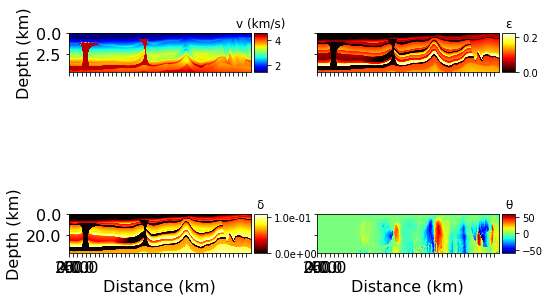

In [4]:
from skimage.transform import rescale, resize, downscale_local_mean
for i, val in enumerate(rec_coordinates):
    if not np.any(val[:,0] < 0):
        break    # break here
        
#only shots with all positive receivers coordinates
rec_coordinates=rec_coordinates[i:]
src_coordinates=src_coordinates[i:]
shots=shots[i:] 
print(src_coordinates[0],src_coordinates[1])
rightborder=math.ceil(src_coordinates[-1][0]/(dz*3))+5
print(rightborder)

vp_resized = resize(vp, (int((vp.shape[0]-1)*dz / (dz*3.)), int((vp.shape[1]-1)*dz / (dz*2.))),anti_aliasing=True)
delta_resized = resize(params[0][:], (int((vp.shape[0]-1)*dz / (dz*3.)), int((vp.shape[1]-1)*dz / (dz*2.))),anti_aliasing=True)
epsilon_resized = resize(params[1][:], (int((vp.shape[0]-1)*dz / (dz*3.)), int((vp.shape[1]-1)*dz / (dz*2.))),anti_aliasing=True)
theta_resized = resize(params[2][:], (int((vp.shape[0]-1)*dz / (dz*3.)), int((vp.shape[1]-1)*dz / (dz*2.))),anti_aliasing=True)
print(dz)
dx=3.*dz
dz=2.*dz

vp=vp_resized[:rightborder+1,:]
delta=delta_resized[:rightborder+1,:]
epsilon=epsilon_resized[:rightborder+1,:]
theta=theta_resized[:rightborder+1,:]
print(vp.shape)

src_coord = src_coordinates[0]
rec_coord = rec_coordinates[0]

print(src_coord[0],rec_coord[-1][0])

# Define horizontal range
if int(src_coord[0]/dx) < int(rec_coord[-1][0]/dx):
        rightmost=int(rec_coord[-1][0]/dx)
else:
        rightmost=int(src_coord[0]/dx)
     #
if int(src_coord[0]/dx) < int(rec_coord[0][0]/dx):
        leftmost=int(src_coord[0]/dx)
else:
        leftmost=int(rec_coord[0][0]/dx)

shape = (rightmost-leftmost+1,vp_resized.shape[-1]) 
spacing = (dx,dz)
origin = (leftmost*dx, 0.)

print(shape)
print(spacing)
print(origin)
print(leftmost)
print(rightmost)
space_order=24

model = Model(vp=vp[leftmost:rightmost+1,:], origin=origin, shape=shape, spacing=spacing,
              space_order=space_order, nbpml=80, epsilon=epsilon[leftmost:rightmost+1,:], 
               delta=delta[leftmost:rightmost+1,:],theta=theta[leftmost:rightmost+1,:],
               dtype=np.float32)

print(model.vp.data.shape)


plot(vp_resized,epsilon_resized,delta_resized,theta_resized)









# Define a physical size
#shape = (rightborder,dims[-1]) 
#spacing = (dz,dz)
#origin = (0., 0.)  
# Set spatial derivatives order
#space_order=8

#model1 = Model(vp=vp[:rightborder+1,:], origin=origin, shape=shape, spacing=spacing,
#              space_order=space_order, nbpml=40, epsilon=params[1][:rightborder+1,:], 
#               delta=params[0][:rightborder+1,:],theta=params[2][:rightborder+1,:],
#               dtype=np.float32)
# Display velocity model
#plot_velocity(model)
#print("Original model dims: {0}".format(shape))

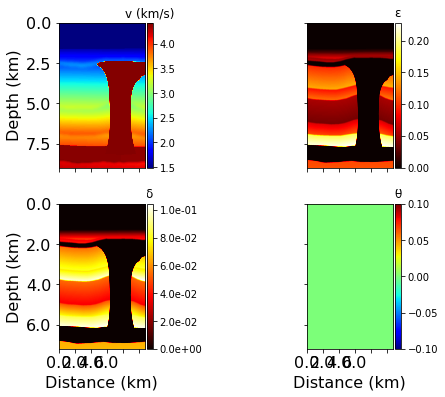

In [5]:
plot(vp[leftmost:rightmost+1,:],epsilon[leftmost:rightmost+1,:],
     delta[leftmost:rightmost+1,:],theta[leftmost:rightmost+1,:])

In [6]:
from examples.seismic.tti import AnisotropicWaveSolver

from examples.seismic import Model, AcquisitionGeometry

# Source and receiver geometries
src_coord = np.empty((1, len(spacing)))
src_coord[:]=src_coordinates[-1]

print(rec_coordinates[-1].shape[0])

rec_coord = np.empty((rec_coordinates[-1].shape[0], len(spacing)))
rec_coord[:]=rec_coordinates[-1]

geometry = AcquisitionGeometry(model1, rec_coord, src_coord,
                                   t0=0.0, tn=4000., src_type='Ricker', f0=0.02)
dt = model1.critical_dt

#solver_tti = AnisotropicWaveSolver(model1, geometry, time_order=2,space_order=space_order)
solver_tti = AnisotropicWaveSolver(model1, geometry, time_order=2,space_order=space_order,save=True)

800


NameError: name 'model1' is not defined

In [ ]:
rec1, u, v, summary = solver_tti.forward()

In [ ]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import plot_shotrecord
print(rec1.data.shape)
plot_shotrecord(rec1.data, model1, 0.0, 4000.)

In [ ]:
g= open('2D_shot_BP_2007.file', 'wb')
np.transpose(rec1.data).astype('float32').tofile(g)

In [ ]:
print(f.trace.raw.shape)
print(len(shots))
print(shots[0].shape)
all_shots= np.concatenate(shots[:6], axis=0)
print(all_shots.shape)

In [ ]:
import matplotlib.pyplot as plt
clip = 1e+1
vmin, vmax = -clip, clip

# Figure
figsize=(20, 20)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k',
                       squeeze=False,
                       sharex=True)
axs = axs.ravel()
#im = axs[0].imshow(f.trace.raw[:].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)
im = axs[0].imshow(all_shots[:].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
from examples.seismic import RickerSource, Receiver, TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 9200.  # Simulation last 9.2 second (9200 ms)
dt = model1.critical_dt  # Time step from model grid spacing
print(dt)

time_range = TimeAxis(start=t0, stop=tn, step=dt)
print(time_range.num)
f0 = 0.020  # Source peak frequency is 20Hz (0.020 kHz)
src = RickerSource(name='src', grid=model1.grid, f0=f0,
                   npoint=1, time_range=time_range)
src.coordinates.data[:] = src_coordinates[298]
print(num_traces[0])
rec = Receiver(name='rec', grid=model1.grid, npoint=int(num_traces[0]), time_range=time_range)
print(f.header[160801])
print(type(rec_coordinates))
print(rec_coordinates[298])
rec.coordinates.data[:] = rec_coordinates[298]

plot_velocity(model1,source=src.coordinates.data,receiver=rec.coordinates.data[::4, :])
#plot_velocity(model, source=src.coordinates.data)

In [ ]:
def ImagingOperator(model, image):
    save=True
    time_order=2
    stagg_u = stagg_v = None
    
    u = TimeFunction(name='u', grid=model.grid, staggered=stagg_u,
                     save=geometry.nt if save else None,
                     time_order=time_order, space_order=space_order)
    v = TimeFunction(name='v', grid=model.grid, staggered=stagg_v,
                     save=geometry.nt if save else None,
                     time_order=time_order, space_order=space_order)
    
    uu = TimeFunction(name='uu', grid=model.grid, staggered=stagg_u,
                     save=geometry.nt if save else None,
                     time_order=time_order, space_order=space_order)
    vv = TimeFunction(name='vv', grid=model.grid, staggered=stagg_v,
                     save=geometry.nt if save else None,
                     time_order=time_order, space_order=space_order)

    residual = PointSource(name='residual', grid=model.grid,
                           time_range=geometry.time_axis,
                           coordinates=geometry.rec_positions) 

    stencils= kernel_centered_2d(model, uu, vv, space_order, forward=False)

    stencils += residual.inject(field=uu, expr=residual * dt**2 / model.m)
    stencils += residual.inject(field=vv, expr=residual * dt**2 / model.m)
    
    # Correlate u and v for the current time step and add it to the image
    image_update = Eq(image, image - (u.dt2* uu + v.dt2*vv))
    return Operator(stencils + [image_update], subs=model.spacing_map)

In [ ]:
from examples.seismic.tti import AnisotropicWaveSolver

# Serial modeling function
def forward_modeling_single_shot(src_coord,rec_coord,shot):
    
    # Read velocity model
    f = segyio.open(par_files[-1], iline=segyio.tracefield.TraceField.FieldRecord, 
                xline=segyio.tracefield.TraceField.CDP)
    xl, il, t = f.xlines, f.ilines, f.samples
    dz = t[1] - t[0]
    dx=f.header[1][segyio.TraceField.SourceX]-f.header[0][segyio.TraceField.SourceX]

    if len(il) != 1: 
      dims=(len(xl), len(il), len(f.samples)) 
    else:
      dims=(len(xl), len(f.samples)) 

    vp=f.trace.raw[:].reshape(dims)
    vp*=1./1000
    epsilon = np.empty(dims)
    delta = np.empty(dims)
    theta = np.empty(dims)
    params=[epsilon, delta, theta]

    # Read Thomsem parameters
    for segyfile, par in zip(par_files, params):
        f = segyio.open(segyfile, iline=segyio.tracefield.TraceField.FieldRecord, 
                xline=segyio.tracefield.TraceField.CDP)
        par[:]=f.trace.raw[:].reshape(dims)
        
    # Define horizontal range
    if int(src_coord[0]/dz) < int(rec_coord[0,-1]/dz):
        leftmost=int(rec_coord[0,-1]/dz)
    else:
        leftmost=int(src_coord[0]/dz)
     #
    if int(src_coord[0]/dz) < int(rec_coord[0,0]/dz):
        rightmost=int(src_coord[0]/dz)
    else:
        rightmost=int(rec_coord[0,0]/dz)
        
    # Define a physical size
    shape = (rightmost-leftmost+1,dims[-1]) 
    spacing = (dz,dz)
    origin = (leftmost*dx, 0.)  
    # Set spatial derivatives order
    space_order=8
        
    model = Model(vp=vp[rightmost:leftmost+1,:], origin=origin, shape=shape, spacing=spacing,
              space_order=space_order, nbpml=40, epsilon=params[0][rightmost:leftmost+1,:], 
               delta=params[1][rightmost:leftmost+1,:],theta=params[2][rightmost:leftmost+1,:],
               dtype=np.float32)

    # Geometry for current shot
    geometry = AcquisitionGeometry(model, rec_coord, src_coord, t0, tn, f0=0.02, src_type='Ricker')
    
    # Set up solver.
    solver = AnisotropicWaveSolver(model, geometry, space_order=4)
    
    # Generate synthetic receiver data 
    d_calc, u, v, _ = solver_tti.forward()
    
    # Create image symbol and instantiate the previously defined imaging operator
    image = Function(name='image', grid=model.grid)
    op_imaging = ImagingOperator(model, image)
    
    vv = TimeFunction(name='vv', grid=model.grid, staggered=None,time_order=2, space_order=8)
    uu = TimeFunction(name='uu', grid=model.grid, staggered=None,time_order=2, space_order=8)
    residual = shot
    
    op_imaging(u=u0, v=v0,vv=vv, uu=uu, vp=model0.vp, dt=model0.critical_dt, 
               residual=residual)
    
    # Convert to numpy array and remove absorbing boundaries
    image_crop = np.array(image.data[:])[geometry.model.nbl:-geometry.model.nbl,
        geometry.model.nbl:-geometry.model.nbl]

    return leftmost,rightmost, image_crop
    

In [ ]:
# Parallel modeling function
def forward_modeling_multi_shots(sources,receivers,shots):
    futures = []
    for i, src in enumerate(sources): 
        src_coord = src
        rec_coord = receivers[i]
        shot_record=shots[i]
        
        # Call serial modeling function for each index
        futures.append(client.submit(forward_modeling_single_shot, src_coord, rec_coord, shot_record))
        
    # Wait for all workers to finish and collect shots
    wait(futures)
    final_image = np.zeros(geometry.model.shape)
    for i in range(geometry.nsrc):
        final_image[futures[i].result()[0]:futures[i].result()[1],:] += futures[i].result()[2]

    return final_image